In [1]:
# ipython
%matplotlib inline

from IPython.display import display as d
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("white")
import glob
import json
import os
import sys
import json
import shutil
import os
import sys
import multiprocessing
import shutil
pool = multiprocessing.Pool(multiprocessing.cpu_count())

from PIL import Image

In [4]:
df = pd.read_json("image_features.json")
d(df)

,image,niqe,color_fulness,tone,blur,saturation,fft,si,contrast,noise,dominant_color,cpbd,blur_stength
0,../images/500px_cc0/medium/100327907_some_days...,18.261774,99.968566,0.344830,5905.874189,8.090593,55631.212467,0.200445,92.210446,0.827311,"[22, 21, 17]",0.985507,0.218320
1,../images/500px_cc0/medium/1003502191_Flat_lay...,18.836861,161.123145,0.912394,693674.672539,14.541476,62936.446231,0.664555,87.581326,0.092663,"[176, 191, 199]",0.995358,0.204170
2,../images/500px_cc0/medium/1011015162_Anemone-...,20.049458,166.402034,0.564914,49200.989096,27.307151,58041.216191,0.306726,91.414505,0.699920,"[39, 41, 31]",0.864078,0.416225
3,../images/500px_cc0/medium/1011015165_Anemone-...,19.260590,166.875180,0.782044,55787.959726,37.136626,56692.475759,0.327116,89.168754,0.784306,"[66, 75, 44]",0.471910,0.441503
4,../images/500px_cc0/medium/1011015217_Anemone-...,19.988764,167.111183,0.770272,26675.419004,40.360669,55033.883335,0.245151,88.064807,0.582428,"[64, 72, 42]",0.661922,0.544027
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,../images/pixabay_first50k/medium/woman-358506...,19.861084,161.086353,0.645935,12932.847169,21.593980,46619.850075,0.180849,92.515967,0.638145,"[13, 13, 14]",0.968447,0.371423
1057,../images/pixabay_first50k/medium/woman-389550...,20.591862,78.759623,0.595703,1814.972172,25.217813,32743.866533,0.085470,74.967186,0.345822,"[18, 16, 15]",0.846154,0.446154
1058,../images/pixabay_first50k/medium/woman-534168...,21.279207,169.018287,0.289614,15706.530708,19.416003,39179.544630,0.165312,81.821017,0.259218,"[13, 14, 10]",0.412481,0.338003
1059,../images/pixabay_first50k/medium/women-120967...,19.433496,150.702964,0.237571,4192.476556,42.622716,51340.681636,0.141170,91.267357,0.740707,"[17, 39, 44]",0.906404,0.330244


In [40]:
# convert data format
# features: colorfulness, tone, saturation, contrast, SI, CPBD, blur strength
dl = pd.DataFrame()
for col in df.columns.difference(["image", "dominant_color", "fft", "blur"]): 
    print(col)
    dd = df[["image", col]].copy().rename(columns={col:"value"})
    dd["feature"] = col
    
    dl = pd.concat([dl, dd], ignore_index=True)
    #break
dl["db"] = dl["image"].apply(lambda x: x.split("/")[2])

d(dl)
print(dl.dtypes)


blur_stength
color_fulness
contrast
cpbd
niqe
noise
saturation
si
tone


,image,value,feature,db
0,../images/500px_cc0/medium/100327907_some_days...,0.218320,blur_stength,500px_cc0
1,../images/500px_cc0/medium/1003502191_Flat_lay...,0.204170,blur_stength,500px_cc0
2,../images/500px_cc0/medium/1011015162_Anemone-...,0.416225,blur_stength,500px_cc0
3,../images/500px_cc0/medium/1011015165_Anemone-...,0.441503,blur_stength,500px_cc0
4,../images/500px_cc0/medium/1011015217_Anemone-...,0.544027,blur_stength,500px_cc0
...,...,...,...,...
9544,../images/pixabay_first50k/medium/woman-358506...,0.645935,tone,pixabay_first50k
9545,../images/pixabay_first50k/medium/woman-389550...,0.595703,tone,pixabay_first50k
9546,../images/pixabay_first50k/medium/woman-534168...,0.289614,tone,pixabay_first50k
9547,../images/pixabay_first50k/medium/women-120967...,0.237571,tone,pixabay_first50k


image       object
value      float64
feature     object
db          object
dtype: object


In [47]:
db_order = sorted(set(dl["db"].values))
print(db_order)

['500px_cc0', 'aadb', 'ava', 'koniq10k', 'own', 'pixabay_first50k']


In [48]:
features = set(dl["feature"].values)
print(features)

{'contrast', 'noise', 'niqe', 'blur_stength', 'saturation', 'color_fulness', 'si', 'tone', 'cpbd'}


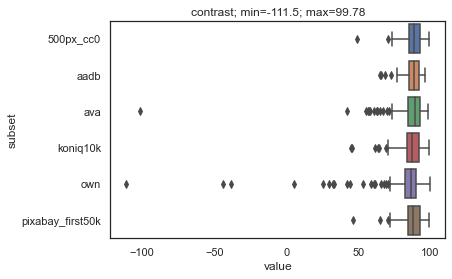

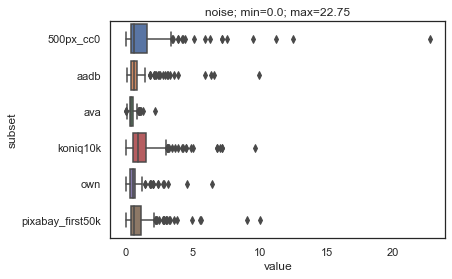

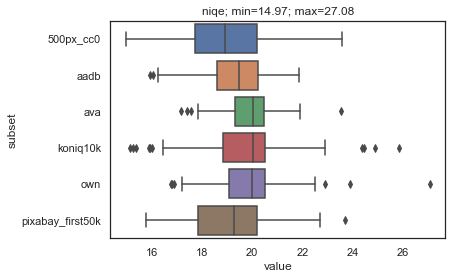

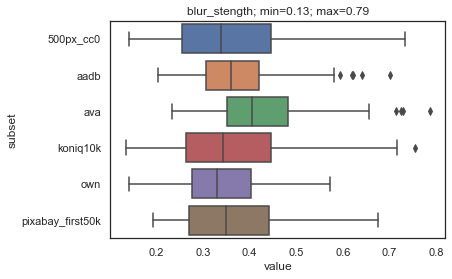

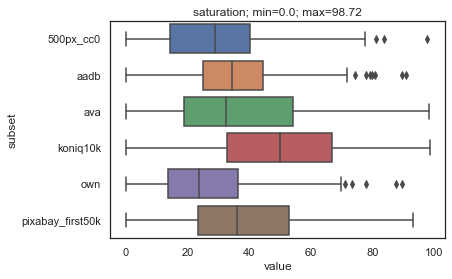

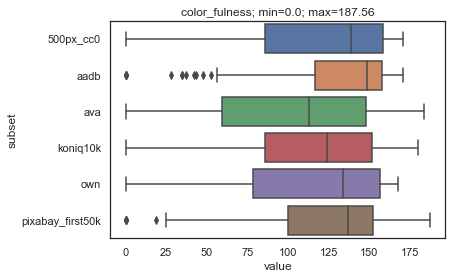

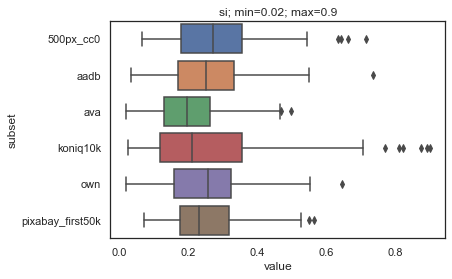

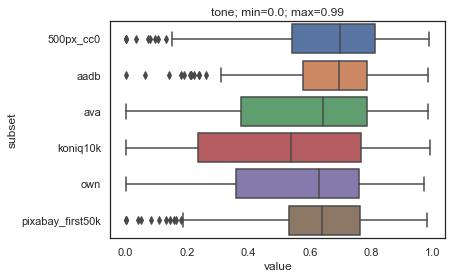

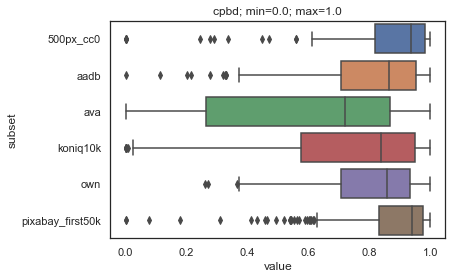

,feature,min,max,mean,median,std
0,contrast,-1.115014e+02,99.781027,86.491218,88.410887,13.238846
1,noise,3.411237e-31,22.746400,1.030626,0.580211,1.479675
2,niqe,1.496721e+01,27.075430,19.427565,19.703173,1.428816
3,blur_stength,1.337240e-01,0.787097,0.373772,0.361036,0.112120
4,saturation,0.000000e+00,98.722962,36.928358,34.099952,22.371114
5,color_fulness,0.000000e+00,187.555871,115.967858,132.439809,48.480775
6,si,1.860349e-02,0.902420,0.251071,0.232510,0.133723
7,tone,0.000000e+00,0.991859,0.589630,0.651216,0.257896
8,cpbd,0.000000e+00,1.000000,0.765406,0.868825,0.266891


In [49]:
import matplotlib.pyplot as plt

fea_stats = []
for fea in features:
    dfea = dl[dl["feature"] == fea]
    ax = sns.boxplot(x="value", y="db", data=dfea,  order=db_order)
    ax.set_ylabel("subset")
    ax.set_title(f"{fea}; min={dfea['value'].min().round(2)}; max={dfea['value'].max().round(2)}")
    ax.get_figure().savefig(f"feature_{fea}.pdf", bbox_inches="tight")
    plt.show()
    fea_stats.append(
        {
            "feature": fea,
            "min": dfea['value'].min(),
            "max": dfea['value'].max(),
            "mean": dfea['value'].mean(),
            "median": np.median(dfea['value']),
            "std": dfea['value'].std()
        }
    )
dstats = pd.DataFrame(fea_stats)
d(dstats)

In [53]:
print(dstats.sort_values(by="feature").round(2).to_latex(index=False))

\begin{tabular}{lrrrrr}
\toprule
      feature &     min &    max &   mean &  median &   std \\
\midrule
 blur\_stength &    0.13 &   0.79 &   0.37 &    0.36 &  0.11 \\
color\_fulness &    0.00 & 187.56 & 115.97 &  132.44 & 48.48 \\
     contrast & -111.50 &  99.78 &  86.49 &   88.41 & 13.24 \\
         cpbd &    0.00 &   1.00 &   0.77 &    0.87 &  0.27 \\
         niqe &   14.97 &  27.08 &  19.43 &   19.70 &  1.43 \\
        noise &    0.00 &  22.75 &   1.03 &    0.58 &  1.48 \\
   saturation &    0.00 &  98.72 &  36.93 &   34.10 & 22.37 \\
           si &    0.02 &   0.90 &   0.25 &    0.23 &  0.13 \\
         tone &    0.00 &   0.99 &   0.59 &    0.65 &  0.26 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_3397910/2733018307.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dstats.sort_values(by="feature").round(2).to_latex(index=False))
